<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install ydata_profiling


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install ipywidgets


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install PyQt5


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error as MSE
from ydata_profiling import ProfileReport
from scipy.stats import rankdata
from phik import phik_matrix

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [6]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [7]:
assert all(c_train in df_test.columns for c_train in df_train.columns )

In [8]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [9]:
def get_df_nulls(df: pd.DataFrame, df_type : str):
    for col in df.columns:
        shape_of_col = df[df[col].isnull()].shape
        if shape_of_col[0] > 0:
            print(f"Столбец {col} в {df_type} датасете имеет {shape_of_col[0]} записей с пропусками")

In [10]:
get_df_nulls(df_train, 'train')

Столбец mileage в train датасете имеет 202 записей с пропусками
Столбец engine в train датасете имеет 202 записей с пропусками
Столбец max_power в train датасете имеет 196 записей с пропусками
Столбец torque в train датасете имеет 203 записей с пропусками
Столбец seats в train датасете имеет 202 записей с пропусками


In [11]:
get_df_nulls(df_test, 'test')

Столбец mileage в test датасете имеет 19 записей с пропусками
Столбец engine в test датасете имеет 19 записей с пропусками
Столбец max_power в test датасете имеет 19 записей с пропусками
Столбец torque в test датасете имеет 19 записей с пропусками
Столбец seats в test датасете имеет 19 записей с пропусками


In [12]:
print(f"В датасете train {df_train[df_train.duplicated()].shape[0]} полных дубликатов")

В датасете train 985 полных дубликатов


In [13]:
print(f"В датасете test {df_test[df_test.duplicated()].shape[0]} полных дубликатов")

В датасете test 62 полных дубликатов


In [14]:
profile = ProfileReport(df_train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 76.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Количество пропусков - неприятное, но терпимое.
Количество дубликатов тоже большое, нужно убирать.
Судя по дашбордам есть только логичная корелляция между пробегом, годом выпуска и ценой(чем старее автомобиль и больше пробег, тем меньше цена).
Также много пропусков именно в двигателе, сиденьях, мощности двигателя(что, возможно, говорит о том, что объекты с пропусками в этих слобцах из какого-то одного источника)

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [15]:
df_train.describe(include=[np.number, np.float64])

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

В трейне представлены автомобили от 1983 по 2020 год, то есть нету какой-то априорно выбросной категории(раритеты).
По количеству сидений: совершенно разные типы автомобилей, от спорткаров до минивенов
Также стоимость автомобилей очень разная, разный пробег и т.п
То есть набор данных по данным признакам достаточно разнообразный

In [16]:
df_test.describe(include=[np.number, np.float64])

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

В целом - очень похоже на трейн, за исключением того, что тут минимум 4 места в каждом автомобиле(нету спорткаров), и год выпуска минимальный повыше, то есть если мы почему-то обучимся плохо предсказывать цену на автомобили до 1995, по трейну мы об этом не узнаем. Хотя ситуация очень гипотетическая.
Также в тесте отсутствуют автомобили без пробега.

Медианы и средние совпадают почти всюду, соответственно выборки можно считать статистически эквивалентными, это IID(одинаково распределенные независимые случайные величины)

In [17]:
df_train_cat = df_train.select_dtypes(include=['object', 'category'])
df_test_cat = df_test.select_dtypes(include=['object', 'category'])

In [18]:
df_train_cat.describe()

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [19]:
df_test_cat.describe()

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

В категориальных признаках по top - почти полное совпадение, подтверждается гипотеза о том, что с трейном и тестом всё ок

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [20]:
target_col = 'selling_price'
feature_cols = [col for col in df_train.columns if col != target_col]
duplicated_mask = df_train.duplicated(subset=feature_cols, keep=False)
num_duplicated = duplicated_mask.sum()
print(f"Кол-во объектов с одинаковым признаковым описанием: {num_duplicated}")
duplicated_rows = df_train[duplicated_mask].sort_values(by=feature_cols)
print(f"Примеры объектов с одинаковым признаковым описанием:")
print(duplicated_rows[feature_cols + [target_col]].head(5))

Кол-во объектов с одинаковым признаковым описанием: 1799
Примеры объектов с одинаковым признаковым описанием:
                                      name  year  km_driven    fuel  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017      22000  Diesel   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017      22000  Diesel   
1836               Audi Q5 3.0 TDI Quattro  2014      76131  Diesel   
6704               Audi Q5 3.0 TDI Quattro  2014      76131  Diesel   
117             Audi Q5 35TDI Premium Plus  2018      31800  Diesel   

     seller_type transmission        owner     mileage   engine   max_power  \
1703      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC  174.33 bhp   
6307      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC  174.33 bhp   
1836  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   241.4 bhp   
6704  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   241.4 bhp   
117       Dealer    Automatic  First Owner  17.01 kmpl  1968 CC     

In [21]:
price_diffs = df_train[duplicated_mask].groupby(feature_cols)[target_col].nunique()
cases_with_diff_prices = (price_diffs > 1).sum()
print(f"Количество случаев, где при одинаковых признаках разные цены: {cases_with_diff_prices}")


Количество случаев, где при одинаковых признаках разные цены: 160


In [22]:

df_train = df_train.drop_duplicates(subset=feature_cols, keep='first')
df_train = df_train.reset_index(drop=True)
print(f"Размер датасета после удаления дубликатов: {df_train.shape}")

Размер датасета после удаления дубликатов: (5840, 13)


In [23]:
assert df_train.shape == (5840, 13), f"Ожидался размер (5840, 13), получен {df_train.shape}"

**Дубликаты с незначительными различиями в числовых признаках.**

Для их выявления можно использовать $\varepsilon$ -окрестность, считая значения расходящиеся на малое число одинаковыми.

**Дубликаты с одинаковым семантическим значением, но разным видом.** 

Слова в разном регистре, синонимы, транслитерации, единицы измерения
Найти их можно с помощью предобработки признаков, а также с помощью кластеризации на много кластеров(для каждого из кластеров возьмём центроид в датасет). Можно использовать k-means конкретно для поиска дублей, потому что более сложные алгоритмы типа dbscan и т.п будут искать сложные кластеры, которые нас не интересуют.

In [24]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [25]:
# Вот этот препроцессинг был навайбкожен для экономии времени и сил :(
def preprocess_features(df):
    df = df.copy()
    if 'mileage' in df.columns:
        df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '', regex=False)
        df['mileage'] = df['mileage'].astype(str).str.replace(' km/kg', '', regex=False)
        df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
    
    if 'engine' in df.columns:
        df['engine'] = df['engine'].astype(str).str.replace(' CC', '', regex=False)
        df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
    
    if 'max_power' in df.columns:
        df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '', regex=False)
        df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
    
    if 'torque' in df.columns:
        df['torque_value'] = df['torque'].astype(str).str.extract(r'([\d.]+)')
        df['torque_value'] = pd.to_numeric(df['torque_value'], errors='coerce')
        
        torque_units = df['torque'].astype(str).str.extract(r'([Nk][mg])', expand=False)
        kgm_mask = torque_units == 'kgm'
        df.loc[kgm_mask, 'torque_value'] = df.loc[kgm_mask, 'torque_value'] * 9.8
        
        df['max_torque_rpm'] = df['torque'].astype(str).str.extract(r'@\s*([\d,]+)')
        df['max_torque_rpm'] = df['max_torque_rpm'].str.replace(',', '', regex=False)
        df['max_torque_rpm'] = df['max_torque_rpm'].fillna('0')
        df['max_torque_rpm'] = pd.to_numeric(df['max_torque_rpm'], errors='coerce')
        
        df['torque'] = df['torque_value']
        df = df.drop('torque_value', axis=1)
    
    return df

df_train = preprocess_features(df_train)
df_test = preprocess_features(df_test)

print("Примеры значений после обработки:")
print(df_train[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']].head(5))

Примеры значений после обработки:
   mileage  engine  max_power  torque  max_torque_rpm
0    23.40  1248.0      74.00  190.00            2000
1    21.14  1498.0     103.52  250.00            1500
2    23.00  1396.0      90.00   22.40               0
3    16.10  1298.0      88.20   11.50            4500
4    20.14  1197.0      81.86  113.75            4000


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [26]:

numeric_cols = df_train.select_dtypes(include=[np.number]).columns
medians = df_train[numeric_cols].median()
for col in numeric_cols:
    df_train[col] = df_train[col].fillna(medians[col])
    df_test[col] = df_test[col].fillna(medians[col])

print("Пропуски в train после заполнения:")
print(df_train.isnull().sum().sum())
print("Пропуски в test после заполнения:")
print(df_test.isnull().sum().sum())

Пропуски в train после заполнения:
0
Пропуски в test после заполнения:
0


Медиана устойчивее к выбросам, чем среднее. В данных о машинах могут быть аномальные значения (очень дорогие или дешевые, машины с огромным пробегом), которые сильно сдвигают среднее, но не влияют на медиану. Среднее можно было бы использовать, если распределение близко к нормальному и выбросов нет, но в нашем случае медиана предпочтительнее.

Медиану нужно считать только по тренировочным данным и использовать её для заполнения пропусков в обоих датасетах. Если считать медиану отдельно для теста, это приведет к data leakage - мы будем использовать информацию из теста при обучении, чего в реальности делать нельзя.


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [27]:
df_train['engine'] = df_train['engine'].astype('Int64') 
df_train['seats'] = df_train['seats'].astype('Int64')
df_test['engine'] = df_test['engine'].astype('Int64')
df_test['seats'] = df_test['seats'].astype('Int64')

`seats` можно рассматривать как категориальную переменную, потому что количество мест ограничено небольшим набором значений (2, 4, 5, 7, 8 и т.д.), а не является непрерывной величиной. Каждое значение имеет четкий смысл: тип автомобиля (спорткар, седан, минивен). Разница между 4 и 5 местами может означать не просто "+1", а переход к другому классу автомобиля. Увеличение мест не всегда пропорционально влияет на цену - минивены с 7 местами могут стоить совсем иначе, чем седаны с 5. Любой метод кодирования категориальных признаков помог бы учесть этот признак лучше, но в этом задании оставляем seats числовым.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков сдвинуло наши распределения? Могло ли это вообще возникнуть?

In [28]:
df_train.describe(include=[np.number])

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000       5840.0   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000        624.0   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000       1197.0   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000       1248.0   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000       1498.0   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000       3604.0   

         max_power       torque     seats  max_torque_rpm  
count  5840.000000  5840.000000    5840.0     5840.000000  
mean     87.906371   161.309570  5.426712     2519.913185  
std      31.640418    91.174286  0.982344     1272.207033  
min       0.000000     4.800000       2.0        0.000000  
25%      68.000000    99.040000       5.0     1750.000000  
50%      81.860000   150.000000       5.0     2000.000000  
75%      99.000000   200.000000       5.0     3500.000000  
max     400.000000   789.000000      14.0    21800.000000

Заполнение пропусков медианой может сдвинуть распределения, если пропуски не случайны. Если пропуски систематические (например, все в определенных категориях машин), то медиана может не отражать реальное распределение для этих категорий. Но в нашем случае, судя по статистикам, сдвиг минимальный - медианы и средние остались близкими к исходным значениям.
Чисто математически, распределение двигается, если двигаются его параметры. Так, например, нормальное распределение характеризуется своим средним и среднеквадратичным отклонением, соответственно заполнение медианой(в случайном порядке) пропусков медианой почти никак не влияет на среднее и среднеквадратичное отклонение, поэтому смещения не происходит.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [29]:

numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 15))
sns.pairplot(df_train[numeric_cols].sample(min(1000, len(df_train)), random_state=42), 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 10})
plt.suptitle('Pairplot для тренировочных данных (train)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

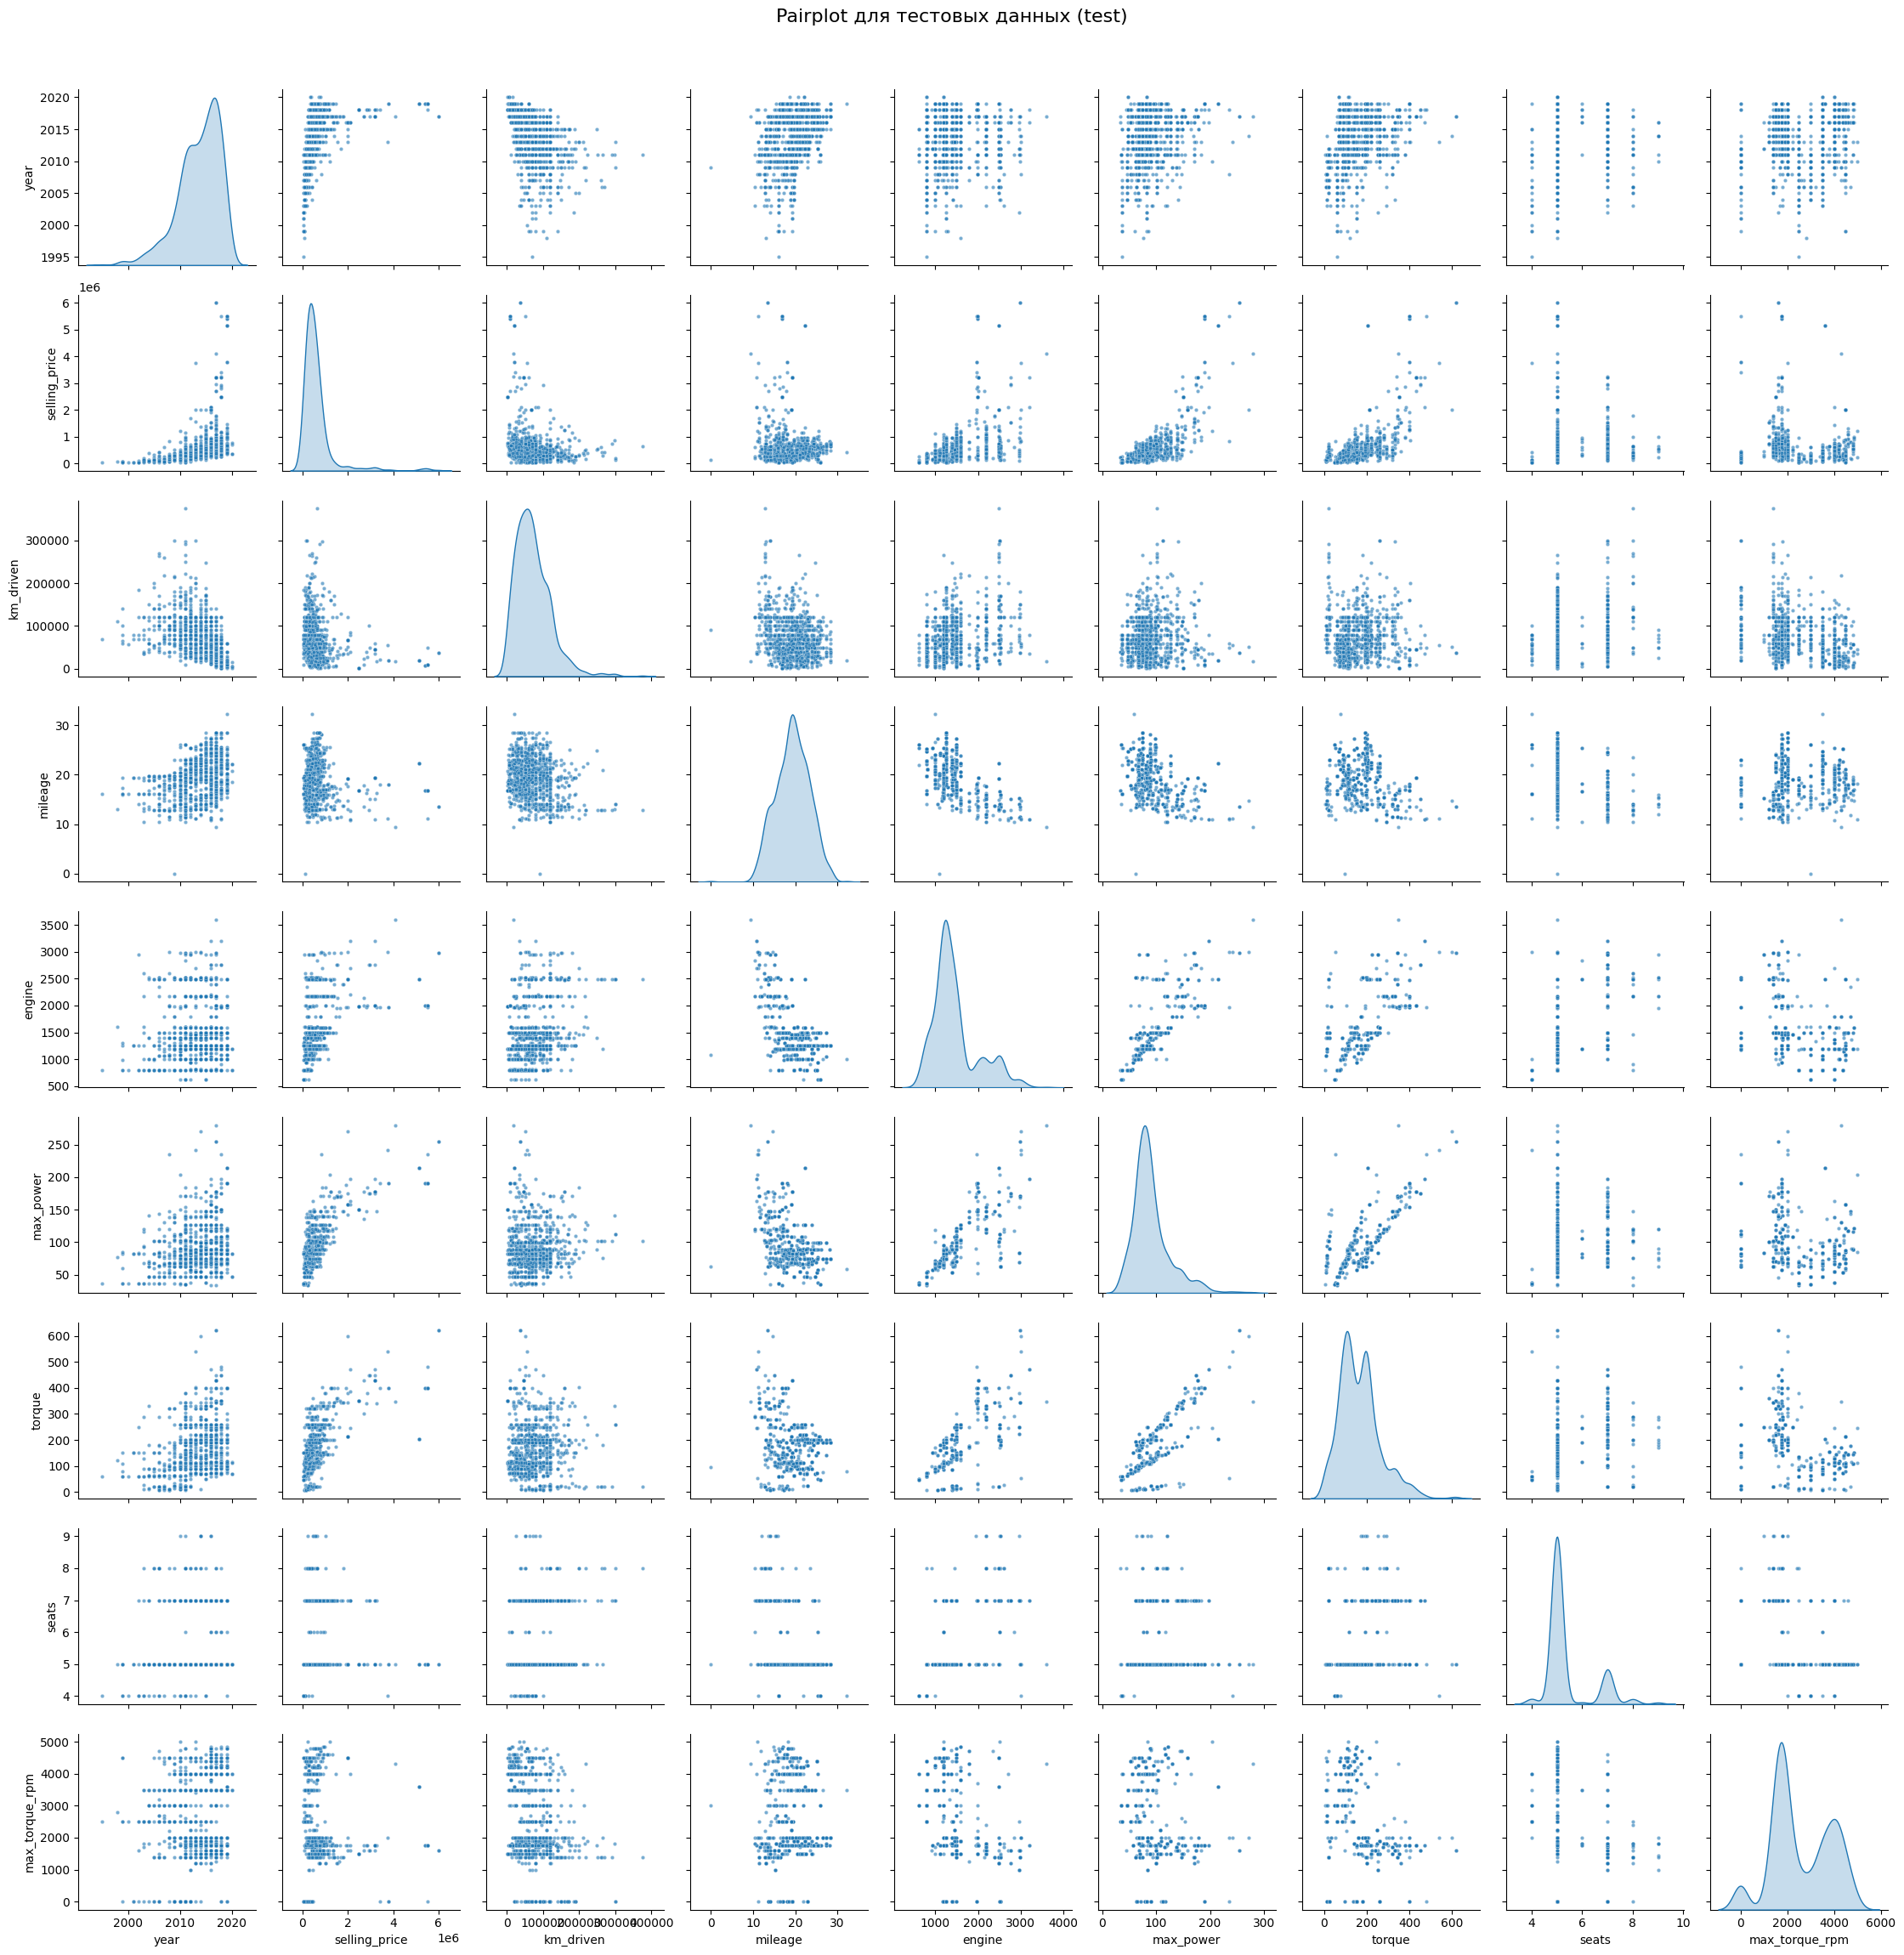

In [30]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_test[numeric_cols].sample(min(1000, len(df_test)), random_state=42), 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 10})
plt.suptitle('Pairplot для тестовых данных (test)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Да, что-то графиков вышло много))
Так ли это делается? Ощущение, что в таком числе графиков можно застрять надолго. Но всё же.

По графикам видно, что год выпуска положительно связан с ценой (новее - дороже), а пробег отрицательно (больше пробег - дешевле). Объем двигателя и мощность тоже положительно коррелируют с ценой. Расход топлива может иметь слабую отрицательную связь.

Между признаками тоже есть зависимости: объем двигателя и мощность сильно связаны (больше объем -> больше мощность), год и пробег отрицательно связаны (старые машины обычно с большим пробегом), объем и крутящий момент положительно связаны.

Распределения на train и test похожи, выборка репрезентативна. Это значит, что модель, обученная на train, должна нормально работать на test, и нет серьезного смещения во время обучения.


### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

Матрица корреляции Пирсона:
                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.250071       0.613397   0.039362 -0.132415  0.612568   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.126607      -0.166848  -0.246398  0.027727 -0.426313   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.250071  0.041178        0.126607  
selling_price    0.692814  0.613397  0.149953       -0.166848  
km_driven        0.024588  0.039362  0.

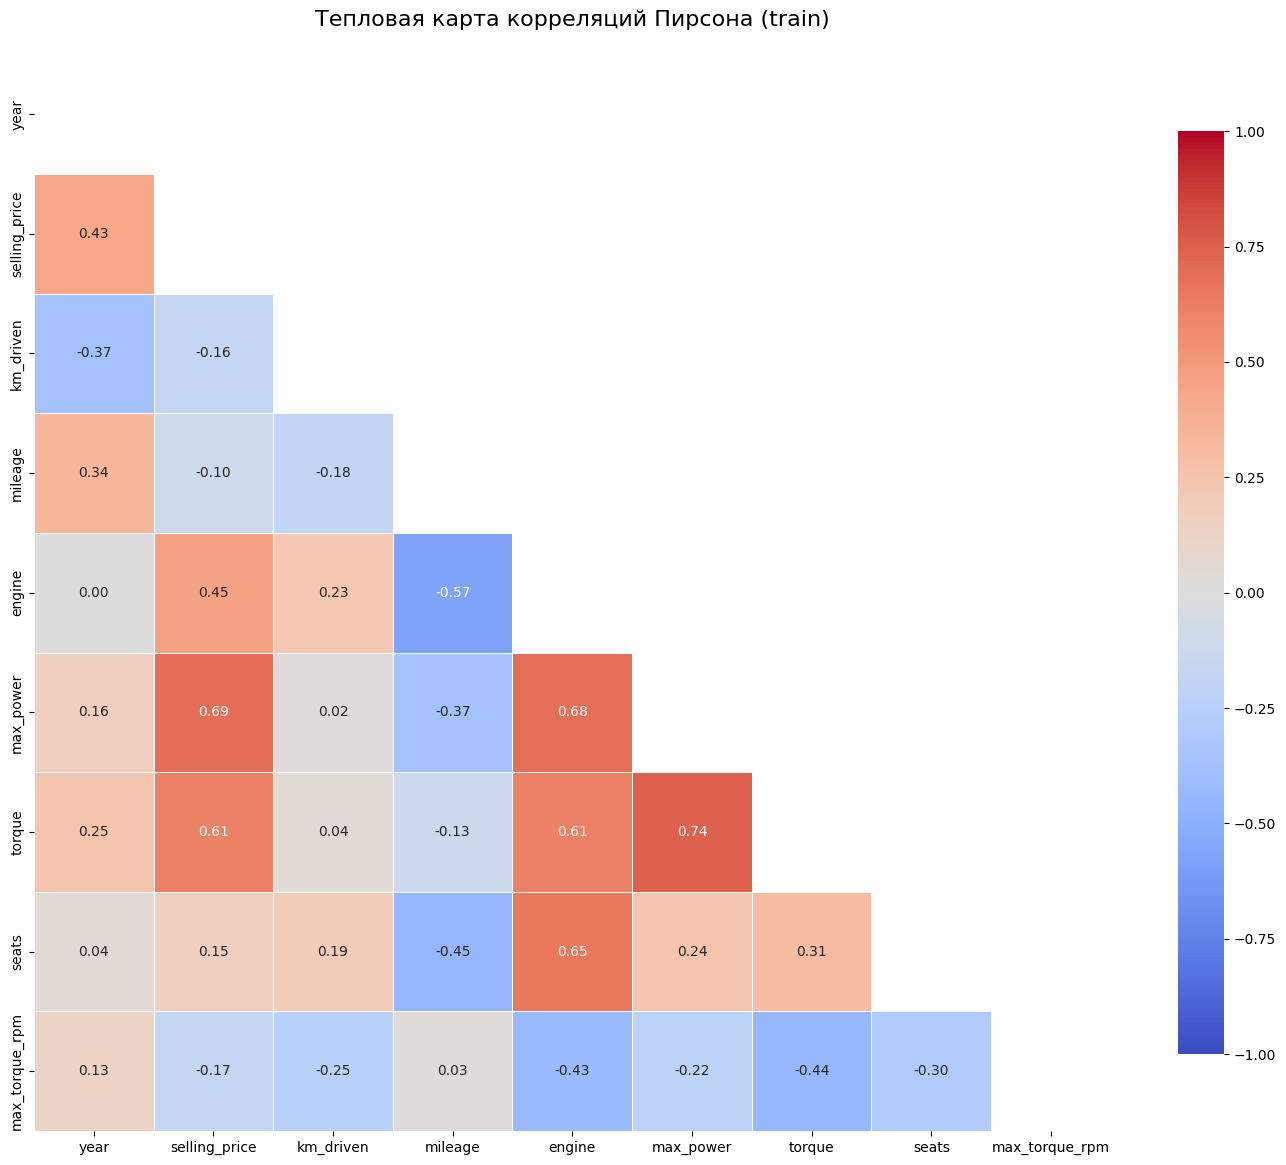

Корреляции признаков с целевой переменной (selling_price):
selling_price     1.000000
max_power         0.692814
torque            0.613397
engine            0.447672
year              0.427279
seats             0.149953
mileage          -0.104769
km_driven        -0.164828
max_torque_rpm   -0.166848
Name: selling_price, dtype: float64


In [31]:
correlation_matrix = df_train[numeric_cols].corr(method='pearson')

print("Матрица корреляции Пирсона:")
print(correlation_matrix)

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций Пирсона (train)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()
target_correlations = correlation_matrix['selling_price'].sort_values(ascending=False)
print("="*80)
print("Корреляции признаков с целевой переменной (selling_price):")
print(target_correlations)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

Наименее скоррелированные признаки - milleage и engine. Сильная положительная линейная зависимость наблюдается между max_power и torque, engine и max_power, а также между selling_price и max_power. 

Да, правильно утверждать, что чем меньше год, тем больше километров проехала машина - это видно по отрицательной корреляции между year и km_driven. Старые машины просто успели больше проехать.

По умолчанию `pd.corr()` использует корреляцию Пирсона, которая измеряет линейную зависимость. Для каких-то очевидных вещей хватит и такой корелляции, а более сложные зависимости могут быть ложными, да и не всегда информативными. Важнее знать факт наличия корелляции, чем её точное значение.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [32]:
def spearman_correlation_manual(x, y):
    """
    Вычисляет корреляцию Спирмена.
    
    Алгоритм:
    1. Преобразуем значения в ранги
    2. Вычисляем корреляцию Пирсона для рангов
    
    Параметры:
    x, y - массивы одинаковой длины
    
    Возвращает:
    Коэффициент корреляции Спирмена
    """
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[mask]
    y_clean = y[mask]
    
    if len(x_clean) < 2:
        return np.nan
    
    x_ranks = rankdata(x_clean, method='average')
    y_ranks = rankdata(y_clean, method='average')
    
    x_mean = np.mean(x_ranks)
    y_mean = np.mean(y_ranks)
    
    numerator = np.sum((x_ranks - x_mean) * (y_ranks - y_mean))
    x_std = np.sqrt(np.sum((x_ranks - x_mean) ** 2))
    y_std = np.sqrt(np.sum((y_ranks - y_mean) ** 2))
    
    if x_std == 0 or y_std == 0:
        return np.nan
    
    correlation = numerator / (x_std * y_std)
    return correlation

print("Сравнение корреляций Спирмена (ручная реализация vs библиотечная):")
print("="*80)

test_pairs = [
    ('year', 'selling_price'),
    ('km_driven', 'selling_price'),
    ('engine', 'max_power')
]

for col1, col2 in test_pairs:
    if col1 in df_train.columns and col2 in df_train.columns:
        manual_corr = spearman_correlation_manual(df_train[col1].values, df_train[col2].values)
        library_corr = df_train[col1].corr(df_train[col2], method='spearman')
        print(f"\n{col1} vs {col2}:")
        print(f"Ручная реализация: {manual_corr:.6f}")
        print(f"Библиотечная (pandas): {library_corr:.6f}")
        print(f"Разница: {abs(manual_corr - library_corr):.10f}")

spearman_matrix_manual = pd.DataFrame(index=numeric_cols, columns=numeric_cols)
for col1 in numeric_cols:
    for col2 in numeric_cols:
        spearman_matrix_manual.loc[col1, col2] = spearman_correlation_manual(
            df_train[col1].values, df_train[col2].values
        )

spearman_matrix_manual = spearman_matrix_manual.astype(float)

spearman_matrix_library = df_train[numeric_cols].corr(method='spearman')

print("="*80)
print("Матрица корреляций Спирмена (библотека):")
print(spearman_matrix_library)

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(spearman_matrix_library, dtype=bool))
sns.heatmap(spearman_matrix_library, 
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций Спирмена (train)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()
print("="*80)
phik_matrix_result = df_train.phik_matrix()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(phik_matrix_result, dtype=bool))
sns.heatmap(phik_matrix_result, 
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='viridis',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Тепловая карта корреляций phik (train)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Корреляции phik с целевой переменной (selling_price):")
if 'selling_price' in phik_matrix_result.columns:
    phik_target = phik_matrix_result['selling_price'].sort_values(ascending=False)
    print(phik_target)
        

Сравнение корреляций Спирмена (ручная реализация vs библиотечная):

year vs selling_price:
Ручная реализация: 0.707123
Библиотечная (pandas): 0.707123
Разница: 0.0000000000

km_driven vs selling_price:
Ручная реализация: -0.295665
Библиотечная (pandas): -0.295665
Разница: 0.0000000000

engine vs max_power:
Ручная реализация: 0.713113
Библиотечная (pandas): 0.713113
Разница: 0.0000000000
Матрица корреляций Спирмена (библотека):
                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.304504   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.429871   
engine         -0.038056       0.463577   0.304504 -0.429871  1.000000   
max_power       0.165798       0.612258   0.040919 -0.308824  0.713113   
torque          0.250972       0.617821   0.110920 

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


c:\Users\jwly_\AppData\Local\Programs\Python\Python313\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


Корреляции phik с целевой переменной (selling_price):
selling_price     1.000000
name              0.994871
max_power         0.872166
torque            0.751748
mileage           0.649768
owner             0.557641
engine            0.503682
transmission      0.463058
seller_type       0.334505
year              0.219841
seats             0.196447
max_torque_rpm    0.180712
fuel              0.157885
km_driven         0.000000
Name: selling_price, dtype: float64


Корреляция Спирмена учитывает монотонную зависимость, а не только линейную, поэтому может выявить связи, которые Пирсон пропустит. В нашем случае результаты близки, что говорит о том, что зависимости в основном почти линейные.
Там где была большая корреляция - она стала больше, значит, характер зависимости не совсем линейный, но эта разница не существенная.

Phik корреляция работает со смешанными типами данных (числовые + категориальные), поэтому может показать связи, которые обычные корреляции не видят. Например, она может выявить связь между категориальным признаком (тип топлива) и числовым (цена).

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [33]:

# График 1: Распределение целевой переменной (selling_price)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_train['selling_price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Цена продажи (selling_price)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение цен на автомобили (train)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(np.log1p(df_train['selling_price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('log(Цена продажи + 1)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение цен (логарифмическая шкала)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Цены имеют правостороннее распределение (много дешевых, мало дорогих машин).
Логарифмическое преобразование может помочь нормализовать распределение.(Это ярко видно по графику)

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [34]:
categorical_cols_to_drop = df_train.select_dtypes(include=['object']).columns.tolist()
df_train_numeric = df_train.select_dtypes(include=[np.number]).copy()
df_test_numeric = df_test.select_dtypes(include=[np.number]).copy()
target_col = 'selling_price'
y_train = df_train_numeric[target_col].copy()
X_train = df_train_numeric.drop(columns=[target_col]).copy()

print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Вещественные признаки в X_train:")
print(X_train.columns.tolist())

Размер X_train: (5840, 8)
Размер y_train: (5840,)
Вещественные признаки в X_train:
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


**Описание выбранных вещественных признаков:**

Мы используем только числовые (вещественные) признаки:
- **year** - год выпуска автомобиля
- **km_driven** - пробег автомобиля в километрах
- **mileage** - расход топлива (kmpl или km/kg)
- **engine** - объем двигателя в кубических сантиметрах (CC)
- **max_power** - максимальная мощность в лошадиных силах (bhp)
- **torque** - крутящий момент в Ньютон-метрах (Nm)
- **max_torque_rpm** - обороты двигателя при максимальном крутящем моменте
- **seats** - количество мест в автомобиле (остается как числовой признак)

**Почему не используем категориальные признаки на этом этапе?**
- Упрощаем модель для лучшей интерпретации
- Проверяем базовое качество модели только на числовых признаках
- Категориальные признаки добавим позже в части 3

In [35]:
y_test = df_test_numeric[target_col].copy()
X_test = df_test_numeric.drop(columns=[target_col]).copy()

print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_test: {y_test.shape}")

assert list(X_train.columns) == list(X_test.columns), "Признаки в train и test должны совпадать!"

Размер X_test: (1000, 8)
Размер y_test: (1000,)


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("="*80)
print("Результаты лин.регрессии")
print("="*80)
print(f"Метрики на TRAIN:")
print(f"R^2: {r2_train:.4f}")
print(f"MSE: {mse_train:.2f}")

print(f"Метрики на TEST:")
print(f"R^2: {r2_test:.4f}")
print(f"MSE: {mse_test:.2f}")

print(f"Разница между train и test:")
print(f"deltaR^2 = {r2_train - r2_test:.4f}")
print(f"deltaMSE = {mse_train - mse_test:.2f}")

Результаты лин.регрессии
Метрики на TRAIN:
R^2: 0.6003
MSE: 114563822229.34
Метрики на TEST:
R^2: 0.5999
MSE: 229972877924.41
Разница между train и test:
deltaR^2 = 0.0004
deltaMSE = -115409055695.07


Сами по-себе метрики ничего не дают, пока не с чем сравнивать. R^2 - это метрика, которая позволяет хорошо сравнить модели, (хотя для добавления признаков она не подойдет, как будет видно далее).
60% объяснённой дисперсии - приемлемое качество, но очень далеко от идеала.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [37]:

def r2_score_manual(y_true, y_pred):
    """
    Вычисляет коэффициент детерминации R^2.
    
    Формула R^2:
    R^2 = 1 - (SS_res / SS_tot)
    где:
    SS_res = sum(y_true - y_pred)^2 - сумма квадратов остатков
    SS_tot = sum(y_true - y_mean)^2 - общая сумма квадратов
    y_mean = mean(y_true) - среднее значение целевой переменной
    
    Параметры:
    y_true - истинные значения целевой переменной
    y_pred - предсказанные значения
    
    Возвращает:
    R^2 - коэффициент детерминации (от -inf до 1, где 1 - идеальное предсказание)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    y_mean = np.mean(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    
    ss_tot = np.sum((y_true - y_mean) ** 2)
    
    if ss_tot == 0:
        return np.nan
    
    r2 = 1 - (ss_res / ss_tot)    
    return r2

r2_manual_train = r2_score_manual(y_train, y_train_pred)
r2_manual_test = r2_score_manual(y_test, y_test_pred)

# Вот тут мне помогла LLM-ка чтобы это в принтах выглядело адекватно, 
# я до пробелов не додумался
print("Сравнение R^2 (ручная реализация vs sklearn):")
print("="*80)
print(f"TRAIN:")
print(f"Ручная реализация: {r2_manual_train:.6f}")
print(f"sklearn:           {r2_train:.6f}")
print(f"Разница:           {abs(r2_manual_train - r2_train):.10f}")

print(f"TEST:")
print(f"Ручная реализация: {r2_manual_test:.6f}")
print(f"sklearn:           {r2_test:.6f}")
print(f"Разница:           {abs(r2_manual_test - r2_test):.10f}")

y_mean_train = np.mean(y_train)
ss_res_train = np.sum((y_train - y_train_pred) ** 2)
ss_tot_train = np.sum((y_train - y_mean_train) ** 2)


Сравнение R^2 (ручная реализация vs sklearn):
TRAIN:
Ручная реализация: 0.600319
sklearn:           0.600319
Разница:           0.0000000000
TEST:
Ручная реализация: 0.599928
sklearn:           0.599928
Разница:           0.0000000000


R^2 показывает долю дисперсии целевой переменной, объясненную моделью. 
Проще говоря, это то, насколько много дисперсии стало "известно" модели после обучения, относительно к исходной дисперсии выборки.
Формула: R^2 = 1 - (SS_res / SS_tot), где SS_res - сумма квадратов остатков (насколько модель ошибается), SS_tot - общая сумма квадратов (общая вариативность данных). Чем ближе R^2 к 1, тем лучше модель объясняет данные.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [38]:
def adjusted_r2_score(y_true, y_pred, n_features):
    """
    Вычисляет скорректированный коэффициент детерминации (adjusted R²).
    
    Формула:
    Adjusted R^2 = 1 - [(1 - R^2) * (n - 1) / (n - k - 1)]
    
    где:
    R² - обычный коэффициент детерминации
    n - количество наблюдений
    k - количество признаков (features)
    
    Параметры:
    y_true - истинные значения
    y_pred - предсказанные значения
    n_features - количество признаков в модели
    
    Возвращает:
    Adjusted R^2
    """
    n = len(y_true)
    r2 = r2_score_manual(y_true, y_pred)
    
    if np.isnan(r2):
        return np.nan
    
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    
    return adjusted_r2

n_features_lr = X_train.shape[1]
adj_r2_train = adjusted_r2_score(y_train, y_train_pred, n_features_lr)
adj_r2_test = adjusted_r2_score(y_test, y_test_pred, n_features_lr)

print("Сравнение R^2 и Adjusted R^2:")
print("="*80)
print(f"TRAIN:")
print(f"R²:           {r2_train:.6f}")
print(f"Adjusted R^2:  {adj_r2_train:.6f}")
print(f"Разница:      {r2_train - adj_r2_train:.6f}")

print(f"TEST:")
print(f"R²:           {r2_test:.6f}")
print(f"Adjusted R^2:  {adj_r2_test:.6f}")
print(f"Разница:      {r2_test - adj_r2_test:.6f}")

Сравнение R^2 и Adjusted R^2:
TRAIN:
R²:           0.600319
Adjusted R^2:  0.599771
Разница:      0.000548
TEST:
R²:           0.599928
Adjusted R^2:  0.596698
Разница:      0.003230


Adjusted R^2 применяется, когда нужно сравнить модели с разным количеством признаков. Обычный R^2 всегда растет при добавлении признаков, даже если они не информативны. Adjusted R^2 штрафует за лишние признаки, поэтому более честно оценивает качество модели. Используется при выборе между моделями с разной сложностью.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"Средние значения признаков в train (после стандартизации): {X_train_scaled.mean().round(6).tolist()}")
print(f"Стандартные отклонения в train (после стандартизации): {X_train_scaled.std().round(6).tolist()}")
print(f"Средние значения признаков в test (после стандартизации): {X_test_scaled.mean().round(6).tolist()}")
print(f"Стандартные отклонения в test (после стандартизации): {X_test_scaled.std().round(6).tolist()}")

Средние значения признаков в train (после стандартизации): [0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0]
Стандартные отклонения в train (после стандартизации): [1.000086, 1.000086, 1.000086, 1.000086, 1.000086, 1.000086, 1.000086, 1.000086]
Средние значения признаков в test (после стандартизации): [0.061675, -0.042602, -0.023091, 0.05236, 0.092779, 0.048279, -0.024141, 0.0429]
Стандартные отклонения в test (после стандартизации): [0.979703, 0.807216, 0.991499, 1.074903, 1.102905, 1.043614, 0.929409, 0.987386]


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

Результаты лин.регрессии на стандартизированных данных
TRAIN: R^2 = 0.6003, MSE = 114563822229.34
TEST:  R^2 = 0.5999, MSE = 229972877924.41
Важность признаков (отсортировано по abs_beta_):
       feature         beta_     abs_beta_
     max_power 286926.312154 286926.312154
          year 157869.477144 157869.477144
        torque  57509.149182  57509.149182
     km_driven -46923.441158  46923.441158
         seats -32095.748484  32095.748484
max_torque_rpm -29662.533496  29662.533496
        engine  26285.002943  26285.002943
       mileage  -2367.975881   2367.975881
Наиболее информативный признак: max_power
abs_beta_: 286926.3122


<Figure size 1000x600 with 0 Axes>

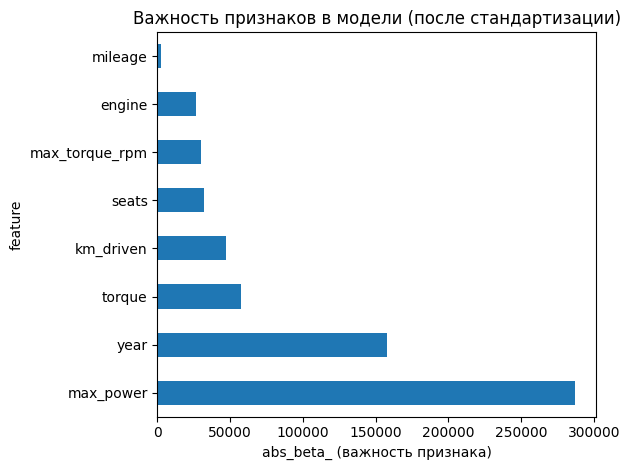

In [40]:

lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_model_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_model_scaled.predict(X_test_scaled)

r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)
mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print("Результаты лин.регрессии на стандартизированных данных")
print("="*80)
print(f"TRAIN: R^2 = {r2_train_scaled:.4f}, MSE = {mse_train_scaled:.2f}")
print(f"TEST:  R^2 = {r2_test_scaled:.4f}, MSE = {mse_test_scaled:.2f}")

coef_scaled_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'beta_': lr_model_scaled.coef_,
    'abs_beta_': np.abs(lr_model_scaled.coef_)
}).sort_values('abs_beta_', ascending=False)

print("="*80)
print("Важность признаков (отсортировано по abs_beta_):")
print("="*80)
print(coef_scaled_df.to_string(index=False))

most_important = coef_scaled_df.iloc[0]
print(f"Наиболее информативный признак: {most_important['feature']}")
print(f"abs_beta_: {most_important['abs_beta_']:.4f}")

plt.figure(figsize=(10, 6))
coef_scaled_df.plot(x='feature', y='abs_beta_', kind='barh', legend=False)
plt.xlabel('abs_beta_ (важность признака)')
plt.title('Важность признаков в модели (после стандартизации)')
plt.tight_layout()
plt.show()

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:


lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print("Результаты lasso-регрессии (alpha=1.0)")
print("="*80)
print(f"TRAIN: R^2 = {r2_train_lasso:.4f}, MSE = {mse_train_lasso:.2f}")
print(f"TEST:  R^2= {r2_test_lasso:.4f}, MSE = {mse_test_lasso:.2f}")

coef_lasso_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'beta_': lr_model_scaled.coef_,
    'abs_beta_': np.abs(lr_model_scaled.coef_)
}).sort_values('abs_beta_', ascending=False)

print("="*80)
print("Коэффициенты в lasso-регресии:")
print("="*80)
print(coef_lasso_df.to_string(index=False))

zero_coefs = (lasso_model.coef_ == 0).sum()
non_zero_coefs = (lasso_model.coef_ != 0).sum()
total_coefs = len(lasso_model.coef_)

print(f"Зануленных коэффициентов: {zero_coefs} из {total_coefs}")
print(f"Ненулевых коэффициентов: {non_zero_coefs} из {total_coefs}")
print("Признаки с зануленными коэффициентами:")
zero_features = coef_lasso_df[coef_lasso_df['feature'] == 0]['feature'].tolist()
print(zero_features)

Результаты lasso-регрессии (alpha=1.0)
TRAIN: R^2 = 0.6003, MSE = 114563822239.89
TEST:  R^2= 0.5999, MSE = 229973582705.23
Коэффициенты в lasso-регресии:
       feature         beta_     abs_beta_
     max_power 286926.312154 286926.312154
          year 157869.477144 157869.477144
        torque  57509.149182  57509.149182
     km_driven -46923.441158  46923.441158
         seats -32095.748484  32095.748484
max_torque_rpm -29662.533496  29662.533496
        engine  26285.002943  26285.002943
       mileage  -2367.975881   2367.975881
Зануленных коэффициентов: 0 из 8
Ненулевых коэффициентов: 8 из 8
Признаки с зануленными коэффициентами:
[]


Качество не изменилось, потому что наша модель скорее недообучена, чем переобучена. Мы видели, что R^2 очень близок между трейном и тестом.
Зануления не произошло, т.к все признаки(даже чисто с т.з их смысла) - важны для стоимости автомобиля.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:

param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000, 5000, 9000, 1e9]
}

lasso = Lasso(random_state=42, max_iter=10000)

grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_search_lasso.best_estimator_

y_train_pred_best_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)

r2_train_best_lasso = r2_score(y_train, y_train_pred_best_lasso)
r2_test_best_lasso = r2_score(y_test, y_test_pred_best_lasso)
mse_train_best_lasso = MSE(y_train, y_train_pred_best_lasso)
mse_test_best_lasso = MSE(y_test, y_test_pred_best_lasso)

print("="*80)
print("Результаты лучшей lasso-модели")
print("="*80)
print(f"Лучшие параметры: {grid_search_lasso.best_params_}")
print(f"Лучший R^2: {grid_search_lasso.best_score_:.4f}")
print(f"TRAIN: R^2 = {r2_train_best_lasso:.4f}, MSE = {mse_train_best_lasso:.2f}")
print(f"TEST:  R^2 = {r2_test_best_lasso:.4f}, MSE = {mse_test_best_lasso:.2f}")

n_alpha_values = len(param_grid_lasso['alpha'])
n_folds = 10
total_models = n_alpha_values * n_folds

print(f"Количество обученных моделей: {total_models}")
print(f"(параметров alpha: {n_alpha_values} × фолдов: {n_folds} = {total_models})")

zero_coefs_best = (best_lasso.coef_ == 0).sum()
print(f"Зануленных коэффициентов в лучшей модели: {zero_coefs_best} из {len(best_lasso.coef_)}")

coef_best_lasso_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'beta_': best_lasso.coef_
}).sort_values('beta_', key=abs, ascending=False)
print("Коэффициенты лучшей Lasso модели:")
print(coef_best_lasso_df.to_string(index=False))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Результаты лучшей lasso-модели
Лучшие параметры: {'alpha': 9000}
Лучший R^2: 0.5805
TRAIN: R^2 = 0.5980, MSE = 115215576191.73
TEST:  R^2 = 0.5879, MSE = 236893367649.71
Количество обученных моделей: 80
(параметров alpha: 8 × фолдов: 10 = 80)
Зануленных коэффициентов в лучшей модели: 2 из 8
Коэффициенты лучшей Lasso модели:
       feature         beta_
     max_power 292297.697674
          year 147437.734345
        torque  59838.310083
     km_driven -37921.880897
max_torque_rpm -18074.004473
         seats  -4786.937824
        engine      0.000000
       mileage      0.000000


- Estimator - сама модель, которую мы хотим обучить.
- Param_grid - словарь, где ключи - параметры, которые мы подбираем, а значение - список вариантов для проверки
- cv - сколько фолдов(частей) в кросс-валидации
- scoring - метрика для оценки моделей, как понять какая лучше
- n_jobs - сколько хотим ядер процессора использовать(-1 значит все)
- verbose - показывать ли прогресс в stout

Ничего не занулилось, причем лучшим alpha был 9000. Это потому, что признаков у нас мало, и все так или иначе влияют на целевую переменную, откровенно шумовых признаков нет.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:


param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # 1 = Lasso, 0 = Ridge
}

elastic_net = ElasticNet(random_state=42, max_iter=10000)

grid_search_elastic = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid_elastic,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_elastic.fit(X_train_scaled, y_train)
best_elastic = grid_search_elastic.best_estimator_

y_train_pred_best_elastic = best_elastic.predict(X_train_scaled)
y_test_pred_best_elastic = best_elastic.predict(X_test_scaled)

r2_train_best_elastic = r2_score(y_train, y_train_pred_best_elastic)
r2_test_best_elastic = r2_score(y_test, y_test_pred_best_elastic)
mse_train_best_elastic = MSE(y_train, y_train_pred_best_elastic)
mse_test_best_elastic = MSE(y_test, y_test_pred_best_elastic)

print("="*80)
print("Результаты лучшей ElasticNet")
print("="*80)
print(f"Лучшие параметры: {grid_search_elastic.best_params_}")
print(f"Лучший R^2: {grid_search_elastic.best_score_:.4f}")
print(f"TRAIN: R^2 = {r2_train_best_elastic:.4f}, MSE = {mse_train_best_elastic:.2f}")
print(f"TEST: R^2 = {r2_test_best_elastic:.4f}, MSE = {mse_test_best_elastic:.2f}")

n_alpha = len(param_grid_elastic['alpha'])
n_l1_ratio = len(param_grid_elastic['l1_ratio'])
n_folds = 10
total_models_elastic = n_alpha * n_l1_ratio * n_folds

print(f"Количество обученных моделей: {total_models_elastic}")
print(f"(параметров alpha: {n_alpha} x l1_ratio: {n_l1_ratio} x фолдов: {n_folds} = {total_models_elastic})")

coef_best_elastic_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'beta_': best_elastic.coef_
}).sort_values('beta_', key=abs, ascending=False)
print("Коэффициенты лучшей ElasticNet модели:")
print(coef_best_elastic_df.to_string(index=False))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
Результаты лучшей ElasticNet
Лучшие параметры: {'alpha': 0.5, 'l1_ratio': 0.7}
Лучший R^2: 0.5819
TRAIN: R^2 = 0.5932, MSE = 116602062592.29
TEST: R^2 = 0.5724, MSE = 245815764589.43
Количество обученных моделей: 420
(параметров alpha: 7 x l1_ratio: 6 x фолдов: 10 = 420)
Коэффициенты лучшей ElasticNet модели:
       feature         beta_
     max_power 218730.065264
          year 136801.244629
        torque  91227.243989
        engine  51048.152170
     km_driven -49093.269235
         seats -31595.167307
max_torque_rpm -14843.824682
       mileage  -2233.833483


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [44]:
# Я пообщался с гемини по поводу семплов из датасета 
# и он мне помог придумать бинарные признаки.
# С базовыми справился сам.
# Премиальный бренд - моё творчество, дальше - спасибо достижениям гугла
# === 1. Базовые признаки ===
# Бренд (первое слово)
df_train['brand'] = df_train['name'].str.split().str[0]
df_test['brand'] = df_test['name'].str.split().str[0]

# Модель (второе слово)
df_train['model'] = df_train['name'].str.split().str[1].fillna('Unknown')
df_test['model'] = df_test['name'].str.split().str[1].fillna('Unknown')

# Длина названия (больше слов = больше опций/комплектация богаче)
df_train['name_len'] = df_train['name'].str.split().str.len()
df_test['name_len'] = df_test['name'].str.split().str.len()

# === 2. Бинарные признаки ===
# Премиальный бренд
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Volvo', 'Jaguar', 'Land', 'Lexus', 'Porsche']
df_train['is_luxury'] = df_train['brand'].isin(luxury_brands).astype(int)
df_test['is_luxury'] = df_test['brand'].isin(luxury_brands).astype(int)

# Турбодизель (TDI, CRDI, TDCI, VDI - обычно дороже)
df_train['has_turbo'] = df_train['name'].str.contains(r'TDI|CRDI|TDCI|Turbo', case=False, regex=True).astype(int)
df_test['has_turbo'] = df_test['name'].str.contains(r'TDI|CRDI|TDCI|Turbo', case=False, regex=True).astype(int)

# Специальная/лимитированная серия (обычно дороже)
df_train['is_special_edition'] = df_train['name'].str.contains(r'Edition|Anniversary|Limited|Special', case=False, regex=True).astype(int)
df_test['is_special_edition'] = df_test['name'].str.contains(r'Edition|Anniversary|Limited|Special', case=False, regex=True).astype(int)

# Расширенная комплектация (Plus, Pro, Premium, Top)
df_train['has_plus_pro'] = df_train['name'].str.contains(r'Plus|Pro|Premium|Top|Asta|ZXI|ZDI', case=False, regex=True).astype(int)
df_test['has_plus_pro'] = df_test['name'].str.contains(r'Plus|Pro|Premium|Top|Asta|ZXI|ZDI', case=False, regex=True).astype(int)

# Базовая комплектация (LXI, LDI, Base, Std - обычно дешевле)
df_train['is_base_trim'] = df_train['name'].str.contains(r'LXI|LDI|Base|Std|Era\b', case=False, regex=True).astype(int)
df_test['is_base_trim'] = df_test['name'].str.contains(r'LXI|LDI|Base|Std|Era\b', case=False, regex=True).astype(int)

# Старый стандарт выбросов (BSII, BSIII - старые машины, дешевле)
df_train['is_old_bs'] = df_train['name'].str.contains(r'BSII|BSIII|BS2|BS3', case=False, regex=True).astype(int)
df_test['is_old_bs'] = df_test['name'].str.contains(r'BSII|BSIII|BS2|BS3', case=False, regex=True).astype(int)

# Полный привод (4WD, AWD, Quattro, 4x4)
df_train['is_4wd'] = df_train['name'].str.contains(r'4WD|AWD|Quattro|4x4|4X4', case=False, regex=True).astype(int)
df_test['is_4wd'] = df_test['name'].str.contains(r'4WD|AWD|Quattro|4x4|4X4', case=False, regex=True).astype(int)

# Дизель в названии (дополнительная проверка)
df_train['diesel_in_name'] = df_train['name'].str.contains(r'Diesel|TDI|CRDI|VDI|DDiS', case=False, regex=True).astype(int)
df_test['diesel_in_name'] = df_test['name'].str.contains(r'Diesel|TDI|CRDI|VDI|DDiS', case=False, regex=True).astype(int)

binary_cols = ['is_luxury', 'has_turbo', 'is_special_edition', 'has_plus_pro', 'is_base_trim', 'is_old_bs', 'is_4wd', 'diesel_in_name']
for col in binary_cols:
    print(f"  {col}: {df_train[col].sum()} ({df_train[col].mean()*100:.1f}%)")

# === Формируем итоговые признаки ===
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model']
numeric_cols_for_cat = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 
                        'name_len', 'is_luxury', 'has_turbo', 'is_special_edition', 'has_plus_pro', 
                        'is_base_trim', 'is_old_bs', 'is_4wd', 'diesel_in_name']

X_train_cat = pd.concat([
    df_train[numeric_cols_for_cat],
    df_train[categorical_cols],
    df_train[['seats']]
], axis=1)

X_test_cat = pd.concat([
    df_test[numeric_cols_for_cat],
    df_test[categorical_cols],
    df_test[['seats']]
], axis=1)

print(f"Размер X_train_cat: {X_train_cat.shape}")
print(f"Размер X_test_cat: {X_test_cat.shape}")
print(f"Столбцы: {list(X_train_cat.columns)}")

  is_luxury: 135 (2.3%)
  has_turbo: 587 (10.1%)
  is_special_edition: 70 (1.2%)
  has_plus_pro: 742 (12.7%)
  is_base_trim: 586 (10.0%)
  is_old_bs: 237 (4.1%)
  is_4wd: 104 (1.8%)
  diesel_in_name: 1367 (23.4%)
Размер X_train_cat: (5840, 23)
Размер X_test_cat: (1000, 23)
Столбцы: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'name_len', 'is_luxury', 'has_turbo', 'is_special_edition', 'has_plus_pro', 'is_base_trim', 'is_old_bs', 'is_4wd', 'diesel_in_name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model', 'seats']


Получилось достаточно много новых признаков:
- brand -  Марка автомобиля
- model    Модель автомобиля
- name_len	Длина названия в словах	Больше слов = богаче комплектация
- is_luxury	Премиальный бренд	BMW, Audi, Mercedes, Volvo и т.п
- has_turbo	Турбодизельный двигатель	TDI, CRDI, TDCI, Turbo
- is_special_edition	Специальная серия	Edition, Anniversary, Limited
- has_plus_pro	Расширенная комплектация	Plus, Pro, Premium, Top, Asta ZXI, ZDI
- is_base_trim	Базовая комплектация	LXI, LDI, Base, Std, Era
- is_old_bs	Старый стандарт выбросов	BSII, BSIII (старые машины = дешевле)
- is_4wd	Полный привод	4WD, AWD, Quattro, 4x4
- diesel_in_name	Дизель в названии

In [45]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand  model
count     5840        5840         5840         5840    5840   5840
unique       4           3            2            5      30    202
top     Diesel  Individual       Manual  First Owner  Maruti  Swift
freq      3177        5223         5336         3603    1804    558

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
categorical_cols_to_encode = categorical_cols + ['seats']

X_train_numeric_part = X_train_cat[numeric_cols_for_cat].copy()
X_train_categorical_part = X_train_cat[categorical_cols_to_encode].copy()

X_test_numeric_part = X_test_cat[numeric_cols_for_cat].copy()
X_test_categorical_part = X_test_cat[categorical_cols_to_encode].copy()

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_cat_encoded = ohe.fit_transform(X_train_categorical_part)
X_test_cat_encoded = ohe.transform(X_test_categorical_part)

feature_names = ohe.get_feature_names_out(categorical_cols_to_encode)

X_train_cat_encoded_df = pd.DataFrame(
    X_train_cat_encoded,
    columns=feature_names,
    index=X_train_categorical_part.index
)

X_test_cat_encoded_df = pd.DataFrame(
    X_test_cat_encoded,
    columns=feature_names,
    index=X_test_categorical_part.index
)

X_train_final = pd.concat([X_train_numeric_part, X_train_cat_encoded_df], axis=1)
X_test_final = pd.concat([X_test_numeric_part, X_test_cat_encoded_df], axis=1)

print(f"Исходное количество категориальных признаков: {len(categorical_cols_to_encode)}")
print(f"Количество признаков после OHE: {X_train_cat_encoded_df.shape[1]}")
print(f"Общее количество признаков (числовые + OHE): {X_train_final.shape[1]}")
assert X_train_final.shape[1] == X_test_final.shape[1], "Количество признаков должно совпадать!"

Исходное количество категориальных признаков: 7
Количество признаков после OHE: 248
Общее количество признаков (числовые + OHE): 264


c:\Users\jwly_\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

OHE нужно обучать только на train данных и применять тот же encoder к test, чтобы избежать утечки целевой переменной в train. Удаляем один столбец для каждой категории, чтобы избежать мультиколлинеарности - если есть n категорий, достаточно n-1 столбца, так как последний линейно выражается через остальные. Это не особо важно, когда мы обучаемся с регуляризацией, но так принято)

Удалять неважные столбцы после обучения некорректно, потому что это приводит к утечке информации - мы используем информацию из теста (какие столбцы неважны) при обучении. Отбор признаков нужно делать до обучения или через кросс-валидацию.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:

scaler_cat = StandardScaler()
X_train_final_scaled = scaler_cat.fit_transform(X_train_final)
X_test_final_scaled = scaler_cat.transform(X_test_final)

X_train_final_scaled = pd.DataFrame(
    X_train_final_scaled,
    columns=X_train_final.columns,
    index=X_train_final.index
)
X_test_final_scaled = pd.DataFrame(
    X_test_final_scaled,
    columns=X_test_final.columns,
    index=X_test_final.index
)

param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0, 500, 1000]
}

ridge = Ridge(random_state=42, max_iter=10000)

grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_ridge.fit(X_train_final_scaled, y_train)

best_ridge_cat = grid_search_ridge.best_estimator_

y_train_pred_ridge_cat = best_ridge_cat.predict(X_train_final_scaled)
y_test_pred_ridge_cat = best_ridge_cat.predict(X_test_final_scaled)

r2_train_ridge_cat = r2_score(y_train, y_train_pred_ridge_cat)
r2_test_ridge_cat = r2_score(y_test, y_test_pred_ridge_cat)
mse_train_ridge_cat = MSE(y_train, y_train_pred_ridge_cat)
mse_test_ridge_cat = MSE(y_test, y_test_pred_ridge_cat)

print("="*80)
print("Результаты лучшей Ridge модели (с категориальными признаками)")
print("="*80)
print(f"Лучшие параметры: {grid_search_ridge.best_params_}")
print(f"Лучший R^2 (CV): {grid_search_ridge.best_score_:.4f}")
print(f"TRAIN: R^2 = {r2_train_ridge_cat:.4f}, MSE = {mse_train_ridge_cat:.2f}")
print(f"TEST:  R^2 = {r2_test_ridge_cat:.4f}, MSE = {mse_test_ridge_cat:.2f}")

print("="*80)
print("Сравнение с моделью только на числовых фичах:")
print("="*80)
print(f"Ridge (только числовые): R^2 test = {r2_test_scaled:.4f}")
print(f"Ridge (с категориальными): R^2 test = {r2_test_ridge_cat:.4f}")
improvement = r2_test_ridge_cat - r2_test_scaled
print(f"Улучшение: {improvement:+.4f} ({improvement/r2_test_scaled*100:+.2f}%)")

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Результаты лучшей Ridge модели (с категориальными признаками)
Лучшие параметры: {'alpha': 500}
Лучший R^2 (CV): 0.7785
TRAIN: R^2 = 0.9006, MSE = 28493319865.33
TEST:  R^2 = 0.9174, MSE = 47477011314.09
Сравнение с моделью только на числовых фичах:
Ridge (только числовые): R^2 test = 0.5999
Ridge (с категориальными): R^2 test = 0.9174
Улучшение: +0.3175 (+52.92%)


Очевидно, категориальные признаки внесли серьёзный вклад в качество, поэтому метрика выросла на 0.3175, это очень-очень приличный прирост. OHE - это достаточно тривиальный способ кодирования, однако в нашей задаче он подходит хорошо, т.к приорода признаков соответствует логике OHE

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# Я очень устал...

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [50]:

def business_metrics(y_true, y_pred, tolerance=0.1):
    """
    Вычисляет долю прогнозов, отличающихся от реальных цен не более чем на заданный процент.
    
    Параметры:
    y_true - истинные значения цен
    y_pred - предсказанные значения цен
    tolerance - допустимое отклонение в долях (по умолчанию 0.1 = 10%)
    
    Возвращает:
    Долю прогнозов в пределах tolerance от реальной цены
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    relative_error = np.abs((y_pred - y_true) / y_true)
    
    within_tolerance = relative_error <= tolerance
    
    proportion = np.mean(within_tolerance)
    
    return proportion

models_results = {
    'Linear Regression (scaled)': (y_test_pred_scaled, y_train_pred_scaled),
    'Lasso (default)': (y_test_pred_lasso, y_train_pred_lasso),
    'Lasso (GridSearch)': (y_test_pred_best_lasso, y_train_pred_best_lasso),
    'ElasticNet (GridSearch)': (y_test_pred_best_elastic, y_train_pred_best_elastic),
    'Ridge (with categorical)': (y_test_pred_ridge_cat, y_train_pred_ridge_cat)
}

print("БИЗНЕС МЕТРИКА: Доля прогнозов в пределах 10% от реальной цены")
print("="*80)

results_business = []

for model_name, (y_test_pred, y_train_pred) in models_results.items():
    metric_test = business_metrics(y_test, y_test_pred)
    metric_train = business_metrics(y_train, y_train_pred)
    
    results_business.append({
        'Модель': model_name,
        'Test (доля в пределах 10%)': metric_test,
        'Train (доля в пределах 10%)': metric_train
    })

results_business_df = pd.DataFrame(results_business)
print("="*80)
print("СВОДНАЯ ТАБЛИЦА:")
print("="*80)
print(results_business_df.to_string(index=False))

best_model_business = results_business_df.loc[results_business_df['Test (доля в пределах 10%)'].idxmax()]
print(f"Лучшая модель по бизнес метрике: {best_model_business['Модель']}")
print(f"Доля прогнозов в пределах 10% на test: {best_model_business['Test (доля в пределах 10%)']:.4f} ({best_model_business['Test (доля в пределах 10%)']*100:.2f}%)")

БИЗНЕС МЕТРИКА: Доля прогнозов в пределах 10% от реальной цены
СВОДНАЯ ТАБЛИЦА:
                    Модель  Test (доля в пределах 10%)  Train (доля в пределах 10%)
Linear Regression (scaled)                       0.241                     0.212500
           Lasso (default)                       0.241                     0.212500
        Lasso (GridSearch)                       0.249                     0.227055
   ElasticNet (GridSearch)                       0.264                     0.232877
  Ridge (with categorical)                       0.368                     0.351541
Лучшая модель по бизнес метрике: Ridge (with categorical)
Доля прогнозов в пределах 10% на test: 0.3680 (36.80%)


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Средний штраф (недопрогно хуже перепрогноза)
(Чем меньше значение, тем лучше модель для бизнеса)
Сводная таблица:
                    Модель  Test (средний штраф)  Train (средний штраф)
Linear Regression (scaled)              0.960123               0.958183
           Lasso (default)              0.960119               0.958177
        Lasso (GridSearch)              0.914084               0.900580
   ElasticNet (GridSearch)              0.818428               0.823716
  Ridge (with categorical)              0.430333               0.413427
Лучшая модель по кастомной бизнес метрике: Ridge (with categorical)
Средний штраф на test: 0.4303


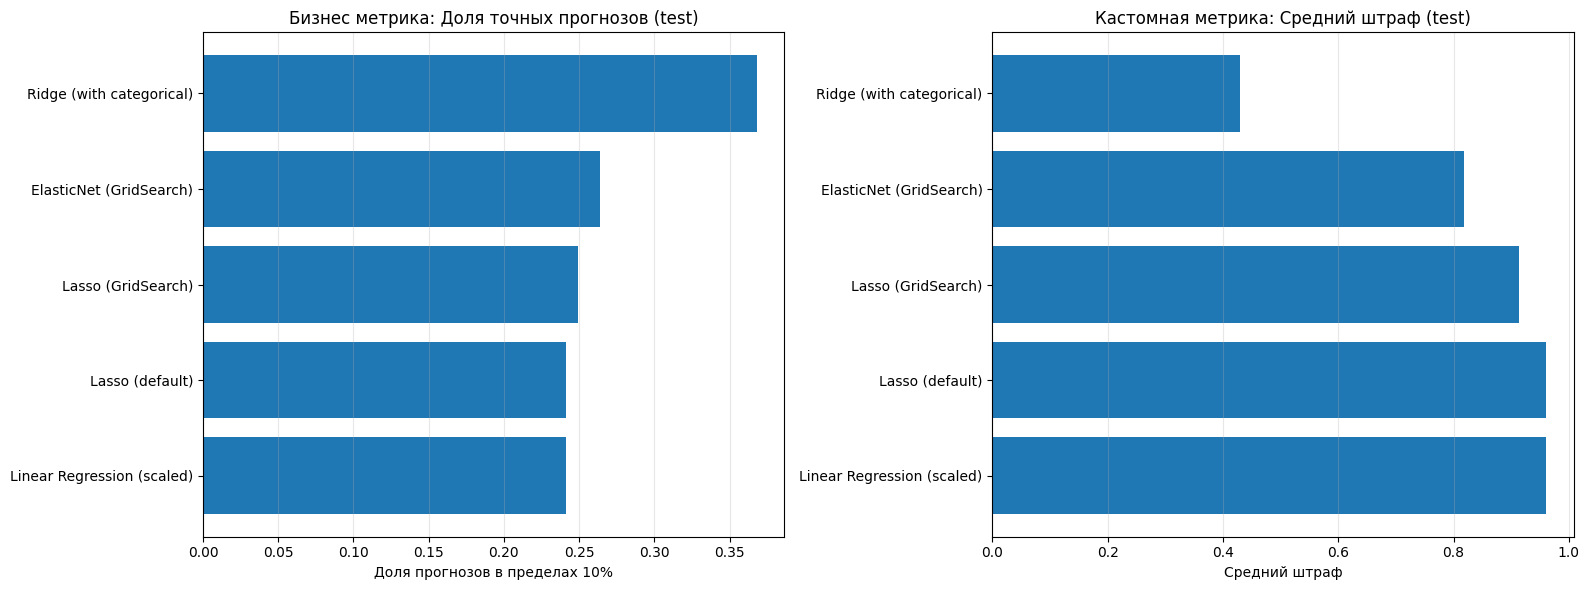

In [52]:
def your_business_metrics(y_true, y_pred, underprediction_penalty=2.0):
    """    
    Идея: Недопрогноз (когда предсказанная цена меньше реальной) хуже для бизнеса,
    так как может привести к потере прибыли. Перепрогноз (завышение цены) менее критичен.
    
    Метрика:
    - Вычисляем относительные ошибки
    - Недопрогнозы штрафуются с коэффициентом underprediction_penalty
    - Перепрогнозы штрафуются с коэффициентом 1.0
    - Возвращаем средний штраф (чем меньше, тем лучше)
    
    Параметры:
    y_true - истинные значения цен
    y_pred - предсказанные значения цен
    underprediction_penalty - коэффициент штрафа за недопрогноз (по умолчанию 2.0)
    
    Возвращает:
    Средний штраф (чем меньше, тем лучше)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = (y_pred - y_true) / y_true
    underprediction_mask = relative_error < 0
    overprediction_mask = relative_error >= 0
    penalties = np.zeros_like(relative_error)
    penalties[underprediction_mask] = np.abs(relative_error[underprediction_mask]) * underprediction_penalty
    penalties[overprediction_mask] = np.abs(relative_error[overprediction_mask]) * 1.0
    mean_penalty = np.mean(penalties)
    
    return mean_penalty

print("Средний штраф (недопрогно хуже перепрогноза)")
print("="*80)
print("(Чем меньше значение, тем лучше модель для бизнеса)")

results_custom_business = []

for model_name, (y_test_pred, y_train_pred) in models_results.items():
    metric_test = your_business_metrics(y_test, y_test_pred, underprediction_penalty=2.0)
    metric_train = your_business_metrics(y_train, y_train_pred, underprediction_penalty=2.0)
    
    results_custom_business.append({
        'Модель': model_name,
        'Test (средний штраф)': metric_test,
        'Train (средний штраф)': metric_train
    })
    

results_custom_business_df = pd.DataFrame(results_custom_business)
print("="*80)
print("Сводная таблица:")
print("="*80)
print(results_custom_business_df.to_string(index=False))

best_model_custom = results_custom_business_df.loc[results_custom_business_df['Test (средний штраф)'].idxmin()]
print(f"Лучшая модель по кастомной бизнес метрике: {best_model_custom['Модель']}")
print(f"Средний штраф на test: {best_model_custom['Test (средний штраф)']:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(results_business_df['Модель'], results_business_df['Test (доля в пределах 10%)'])
axes[0].set_xlabel('Доля прогнозов в пределах 10%')
axes[0].set_title('Бизнес метрика: Доля точных прогнозов (test)')
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(results_custom_business_df['Модель'], results_custom_business_df['Test (средний штраф)'])
axes[1].set_xlabel('Средний штраф')
axes[1].set_title('Кастомная метрика: Средний штраф (test)')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

In [ ]:

best_pipeline = Pipeline([
    ('scaler', scaler_cat),
    ('model', best_ridge_cat)
])

with open('model_pipeline.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)

with open('ohe_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

feature_info = {
    'numeric_features': numeric_cols_for_cat,
    'categorical_features': categorical_cols_to_encode,
    'feature_names_after_ohe': list(X_train_final.columns)
}

with open('feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)

df_train_for_eda = df_train.copy()
df_train_for_eda.to_csv('train_data_for_eda.csv', index=False)

print("Модель и вспомогательные объекты сохранены:")
print("model_pipeline.pkl (пайплайн: scaler + model)")
print("ohe_encoder.pkl (OneHotEncoder для категориальных признаков)")
print("feature_info.pkl (информация о признаках)")
print("train_data_for_eda.csv (данные для EDA графиков)")


Модель и вспомогательные объекты сохранены:
model_pipeline.pkl (пайплайн: scaler + model)
ohe_encoder.pkl (OneHotEncoder для категориальных признаков)
feature_info.pkl (информация о признаках)
train_data_for_eda.csv (данные для EDA графиков)


Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
